In [1]:
import pandas as pd
import sqlite3

# Part 1: Kaggle

### Problem 1. 
My account username is aboyarsky, under aboyarsky@uchicago.edu

### Problem 2.
The Passanger Screening Algorith Challenge is very fascinating. The TSA is looking for an algorithm to better screen luggage and people to prevent false alarms. This is very interesting to me as it clearlyhas political significance. First, any algorithm that is develoed will most likely be addressing a classification problem. That is, threat or not threat. However, this will most likely based on patterns in the data. While, it is probably very easy to create a program that will identify these correlations this very much has the possibility for bias. I.E. an algorithm may notice a correlation between skin color and threat level. This could lead to higher rates of stoppage for thes people. However, this is certainly not indicative of a casual relationship. Hence, these results will contain bias. This is could be made even worse if it discounts real threats based on skin color. Hence, this problem is intriguing as  this algorithm should go beyond simply detecting correlation. It must account for bias and perhaps even impliment some sort of casual inference mechanism.

To submit to this, I would need to download the data set. Conduct some exploratory data analysis. And, attempt to write an algorithm that would take in training data predict the threat level with as little bias as possible while still scoring highly on the test data. This could be written in Python. Chances are that since the data is image based (body scans of varying body zones) I would use a nueral network for classification tasks. This will probably involve a few retraining steps to avoid overfitting and avoid bias as much as possible. It may be possible to generate other data based on this the given data to improve the classification results.

### Problem 3.

This is a dataset of European Football. It includes countries, matches, leagues, and teams. The data is rather large so we will focus on the best team in world football, Tottenham Hotspur. Come on you Spurs. 

Notice we use a generator for this due to size concerns.

In [2]:
with sqlite3.connect("database.sqlite") as conn:
    tot = pd.read_sql_query("SELECT * From Team WHERE team_short_name = 'TOT'", conn)

In [3]:
tot

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,3470,8586,18,Tottenham Hotspur,TOT


Now, we get team attributes and matches based on the team_api_id (8586):


In [4]:
with sqlite3.connect("database.sqlite") as conn:
    tot_attr = pd.read_sql_query("SELECT * From Team_Attributes WHERE team_api_id = 8586", conn)
    tot_matches = pd.read_sql_query("SELECT * From Match WHERE (home_team_api_id = 8586) OR (away_team_api_id = 8586)",conn)

Now, we will plot the distribution of goals scored by Tottenham:

In [5]:
tot_matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,2.20,3.20,3.40,2.30,3.00,3.25,2.30,2.80,3.25,2.30
1,1740,1729,1729,2008/2009,10,2008-10-29 00:00:00,489133,9825,8586,4,...,8.00,1.45,4.40,7.50,1.45,4.00,7.00,1.40,4.00,8.00
2,1750,1729,1729,2008/2009,11,2008-11-01 00:00:00,489143,8586,8650,2,...,2.05,3.35,3.50,2.15,3.60,3.35,2.05,3.40,3.20,2.10
3,1764,1729,1729,2008/2009,12,2008-11-09 00:00:00,489157,8456,8586,1,...,3.40,2.25,3.25,3.40,2.20,3.20,3.30,2.20,3.20,3.25
4,1775,1729,1729,2008/2009,13,2008-11-15 00:00:00,489168,9879,8586,2,...,2.25,2.90,3.25,2.25,3.10,3.30,2.25,3.25,3.20,2.20


In [6]:
tot_matches.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,304.000000,304.0,304.0,304.000000,3.040000e+02,304.000000,304.000000,304.000000,304.000000,304.0,...,232.000000,304.000000,304.000000,304.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3249.177632,1729.0,1729.0,19.500000,1.178768e+06,8878.776316,8878.776316,1.562500,1.197368,1.0,...,4.429784,2.507938,3.850559,4.551069,2.392947,3.662474,4.343368,2.397632,3.684053,4.459421
std,880.218159,0.0,0.0,10.983937,4.916928e+05,613.827361,613.827361,1.328555,1.114202,0.0,...,2.654362,1.068682,0.648255,2.868960,0.955835,0.563964,2.575171,0.972655,0.566474,2.710153
min,1735.000000,1729.0,1729.0,1.000000,4.890480e+05,8191.000000,8191.000000,0.000000,0.000000,1.0,...,1.530000,1.220000,2.500000,1.500000,1.220000,3.200000,1.530000,1.220000,3.200000,1.530000
25%,2493.750000,1729.0,1729.0,10.000000,7.946960e+05,8586.000000,8586.000000,1.000000,0.000000,1.0,...,2.300000,1.570000,3.400000,2.300000,1.550000,3.250000,2.250000,1.530000,3.250000,2.300000
50%,3247.000000,1729.0,1729.0,19.500000,1.127217e+06,8586.000000,8586.000000,1.000000,1.000000,1.0,...,3.400000,2.200000,3.600000,3.400000,2.100000,3.400000,3.350000,2.100000,3.500000,3.400000
75%,4009.750000,1729.0,1729.0,29.000000,1.537337e+06,8659.000000,8659.000000,2.000000,2.000000,1.0,...,6.500000,3.250000,4.200000,6.500000,3.100000,3.800000,6.000000,3.100000,3.900000,6.000000
max,4766.000000,1729.0,1729.0,38.000000,1.989078e+06,10261.000000,10261.000000,9.000000,5.000000,1.0,...,15.000000,7.000000,6.500000,17.000000,5.750000,6.000000,13.000000,6.000000,6.000000,13.000000


In [7]:
home_games = tot_matches[tot_matches.home_team_api_id == 8586]
away_games = tot_matches[tot_matches.away_team_api_id == 8586]

In [8]:
goals = home_games['home_team_goal'].append(away_games['away_team_goal'])

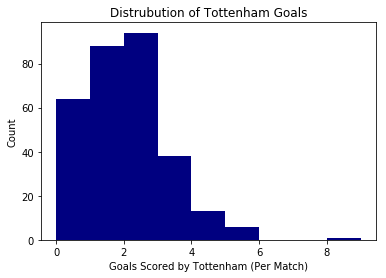

In [9]:
import matplotlib.pyplot as plot
import matplotlib.mlab as mlab
import matplotlib.dates as dates


plot.hist(goals, bins = max(goals), color="navy")
plot.xlabel("Goals Scored by Tottenham (Per Match)")
plot.ylabel("Count")
plot.title("Distrubution of Tottenham Goals")
plot.show()

Here is a timeseries of goals scored:

In [10]:
goals_by_date = home_games[['home_team_goal', 'date']].append(away_games[['away_team_goal', 'date']])

In [11]:
goals_by_date['goal'] = goals_by_date['home_team_goal'].fillna(goals_by_date['away_team_goal'])

In [12]:
goals_by_date['date'] = pd.to_datetime(goals_by_date['date'])
g_series = pd.Series(goals_by_date['goal'].values, index = goals_by_date['date'])


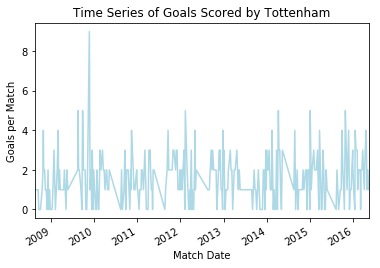

In [13]:
g_series.plot(color = "lightblue")
plot.xlabel("Match Date")
plot.ylabel("Goals per Match")
plot.title("Time Series of Goals Scored by Tottenham")
plot.show()

There is clearly alot of variation. However it seems to hover around 2. Which makes sense given the mean:

In [14]:
import numpy as np
np.mean(goals)

1.582236842105263

# Part 2: Revise an Academic Study with a Computational Technique

In "The Economic Payoff of Name Americanization", published in the _Journal of Labor Economics_ Biavaschi et al. (2016) utilize immigration records to show that individuals who choose to Americanize their names during the immigration process have better economic outcomes in the long-run. While the paper makes a strong case for it's finding, the authors could also have implemented a game theoretic approach that could have taken advantage of human computation to further bolster their results.

Specifically, the authors could have created an MTurk HIT that would emulate a budget allocation game. Specifically, Turker's could be randomly asked to divide some budget, $\$M$, between themselves and another individual given only their name. The game would require that they atleast allocate \$1 to the other individual. Some, individuals would randomly recieve the americanized name, while others would recieve the original name. Of course, a fully rational individual would take the entire budget, save the $1 they are required to allocate. However, baed on previous research by Habyarimana et al. (2007) would suggest that the name will have an effect on allocation. Additionally, if an effect were found, we could create a measure based on the difference of the edited and original name (this could be done with some custom form of Word2Vec) and the average difference in allocation. Thus, we can use a human experiment in combination with the data aready used in the study to compute the effect changing a name has on earning potential. 

This would lead to an improved study as it would be going beyond traditional econometric technique of evaluatng corellation and causation to actually preforming a randomized control trial to infer causation. Thus, it would greatly  increase the robustness of the results. Also, this works to add a behavioral component to the paper, which might allow for broader implications. As this would now be incorporating behavioral insights into labor market research.

### References

Costanza Biavaschi, Corrado Giulietti, and Zahra Siddique, "The Economic Payoff of Name Americanization," Journal of Labor Economics 35, no. 4 (October 2017): 1089-1116.

Habyarimana, James, Macartan Humphreys, Daniel N. Posner, and Jeremy M. Weinstein. "Why does ethnic diversity undermine public goods provision?." American Political Science Review 101, no. 4 (2007): 709-725.

# Part 3: Amazon MTurk

Below are screenshots of my MTurk account's HITs and qualifications page (If they do not appear they are also included in pull request/submision folder). Notice that not all these HITs have been accepted by the Requester at the time of this submission.

<img src='mturk_account.png'>

<img src="mturk_qualifications.png" />